In [1]:
!pip install wordcloud

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

In [3]:
#Transfers data to lists
df = pd.read_csv('Datasets/outputLatest.csv')

#gets all names of collums 
top = list(df.columns)

#collums to iterate throught
count = len(top)

#change all types after 'words' to numeric value for charts
for i in range(1,count):
    df[top[i]] = df[top[i]].astype(float)
    
#how to sort 
highest_count = df.sort_values(by=top[1], ascending=False)
 

# document-1: Concept drift and machine learning model for detecting.txt
tf1 = df.sort_values(by=top[3], ascending=False)
tf1Subset = tf1.iloc[0:50, 0:1]
set1 = set(tf1Subset['Words'])

# document-2: Unveiling Data Science Dynamics.txt
tf2 = df.sort_values(by=top[4], ascending=False)
tf2Subset = tf2.iloc[0:50, 0:1]
set2 = set(tf2Subset['Words'])


#symetrical difference
set3 = (set1 | set2) - (set1 & set2)




In [4]:
#--- Turning symetrical difference into a dictionary ----#

#check in the df if "word" is there
mask = df['Words'].isin(set3)

#grabs only the instance of word being shown
fill = df[mask]

#pulls the first two collums
cut = fill.iloc[: , 0:2 ]

#based on collum turn df into a dictionary
book = dict(zip(cut['Words'],cut['WordCounts']))

#top values after symetrical different
df_temp = pd.DataFrame(list(book.items()), columns=['Words', 'WordCounts'])
tf3 = df_temp.sort_values(by='WordCounts', ascending=False)



In [5]:
#-----------------------visuals-------------------#
# 3 main points for visuals to work
# call our sorted set == a
# specifc collum == x,y
# in a call x,y 

In [6]:
#--------------------bhar--------------------------#

def barh(a,x,y,z,c):
    width = .35
    plt.barh(a[top[x]][:10], a[top[y]][:10],width, color=c)
    plt.title(z)
    for pos in ['right', 'top']: 
        plt.gca().spines[pos].set_visible(False) 
    plt.show()
    


In [7]:
#-------------------pie-----------------------#

def pie(a,x,y):
    plt.pie(a[top[y]][:10], labels=a[top[x]][:10],
            autopct='%1.1f%%', pctdistance=0.84,
            
            wedgeprops= {
                "edgecolor":"black", 
                'linewidth': 1, 
                'antialiased': True
                }
            )
     
    centre_circle = plt.Circle((0, 0), 0.70, fc='white', edgecolor='black')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
     
    plt.title('Top Word counts')
     
    plt.show()


In [8]:
#---------------World Cloud---------------------#    

def cloud(a):
    wc = WordCloud(width = 1000, height = 500,background_color="white").generate_from_frequencies(a)

    plt.figure(figsize=(15,8))
    for pos in ['right', 'top', 'left','bottom']: 
        plt.gca().spines[pos].set_visible(False)
    plt.xticks(visible=False)
    plt.yticks(visible=False)

    plt.imshow(wc)




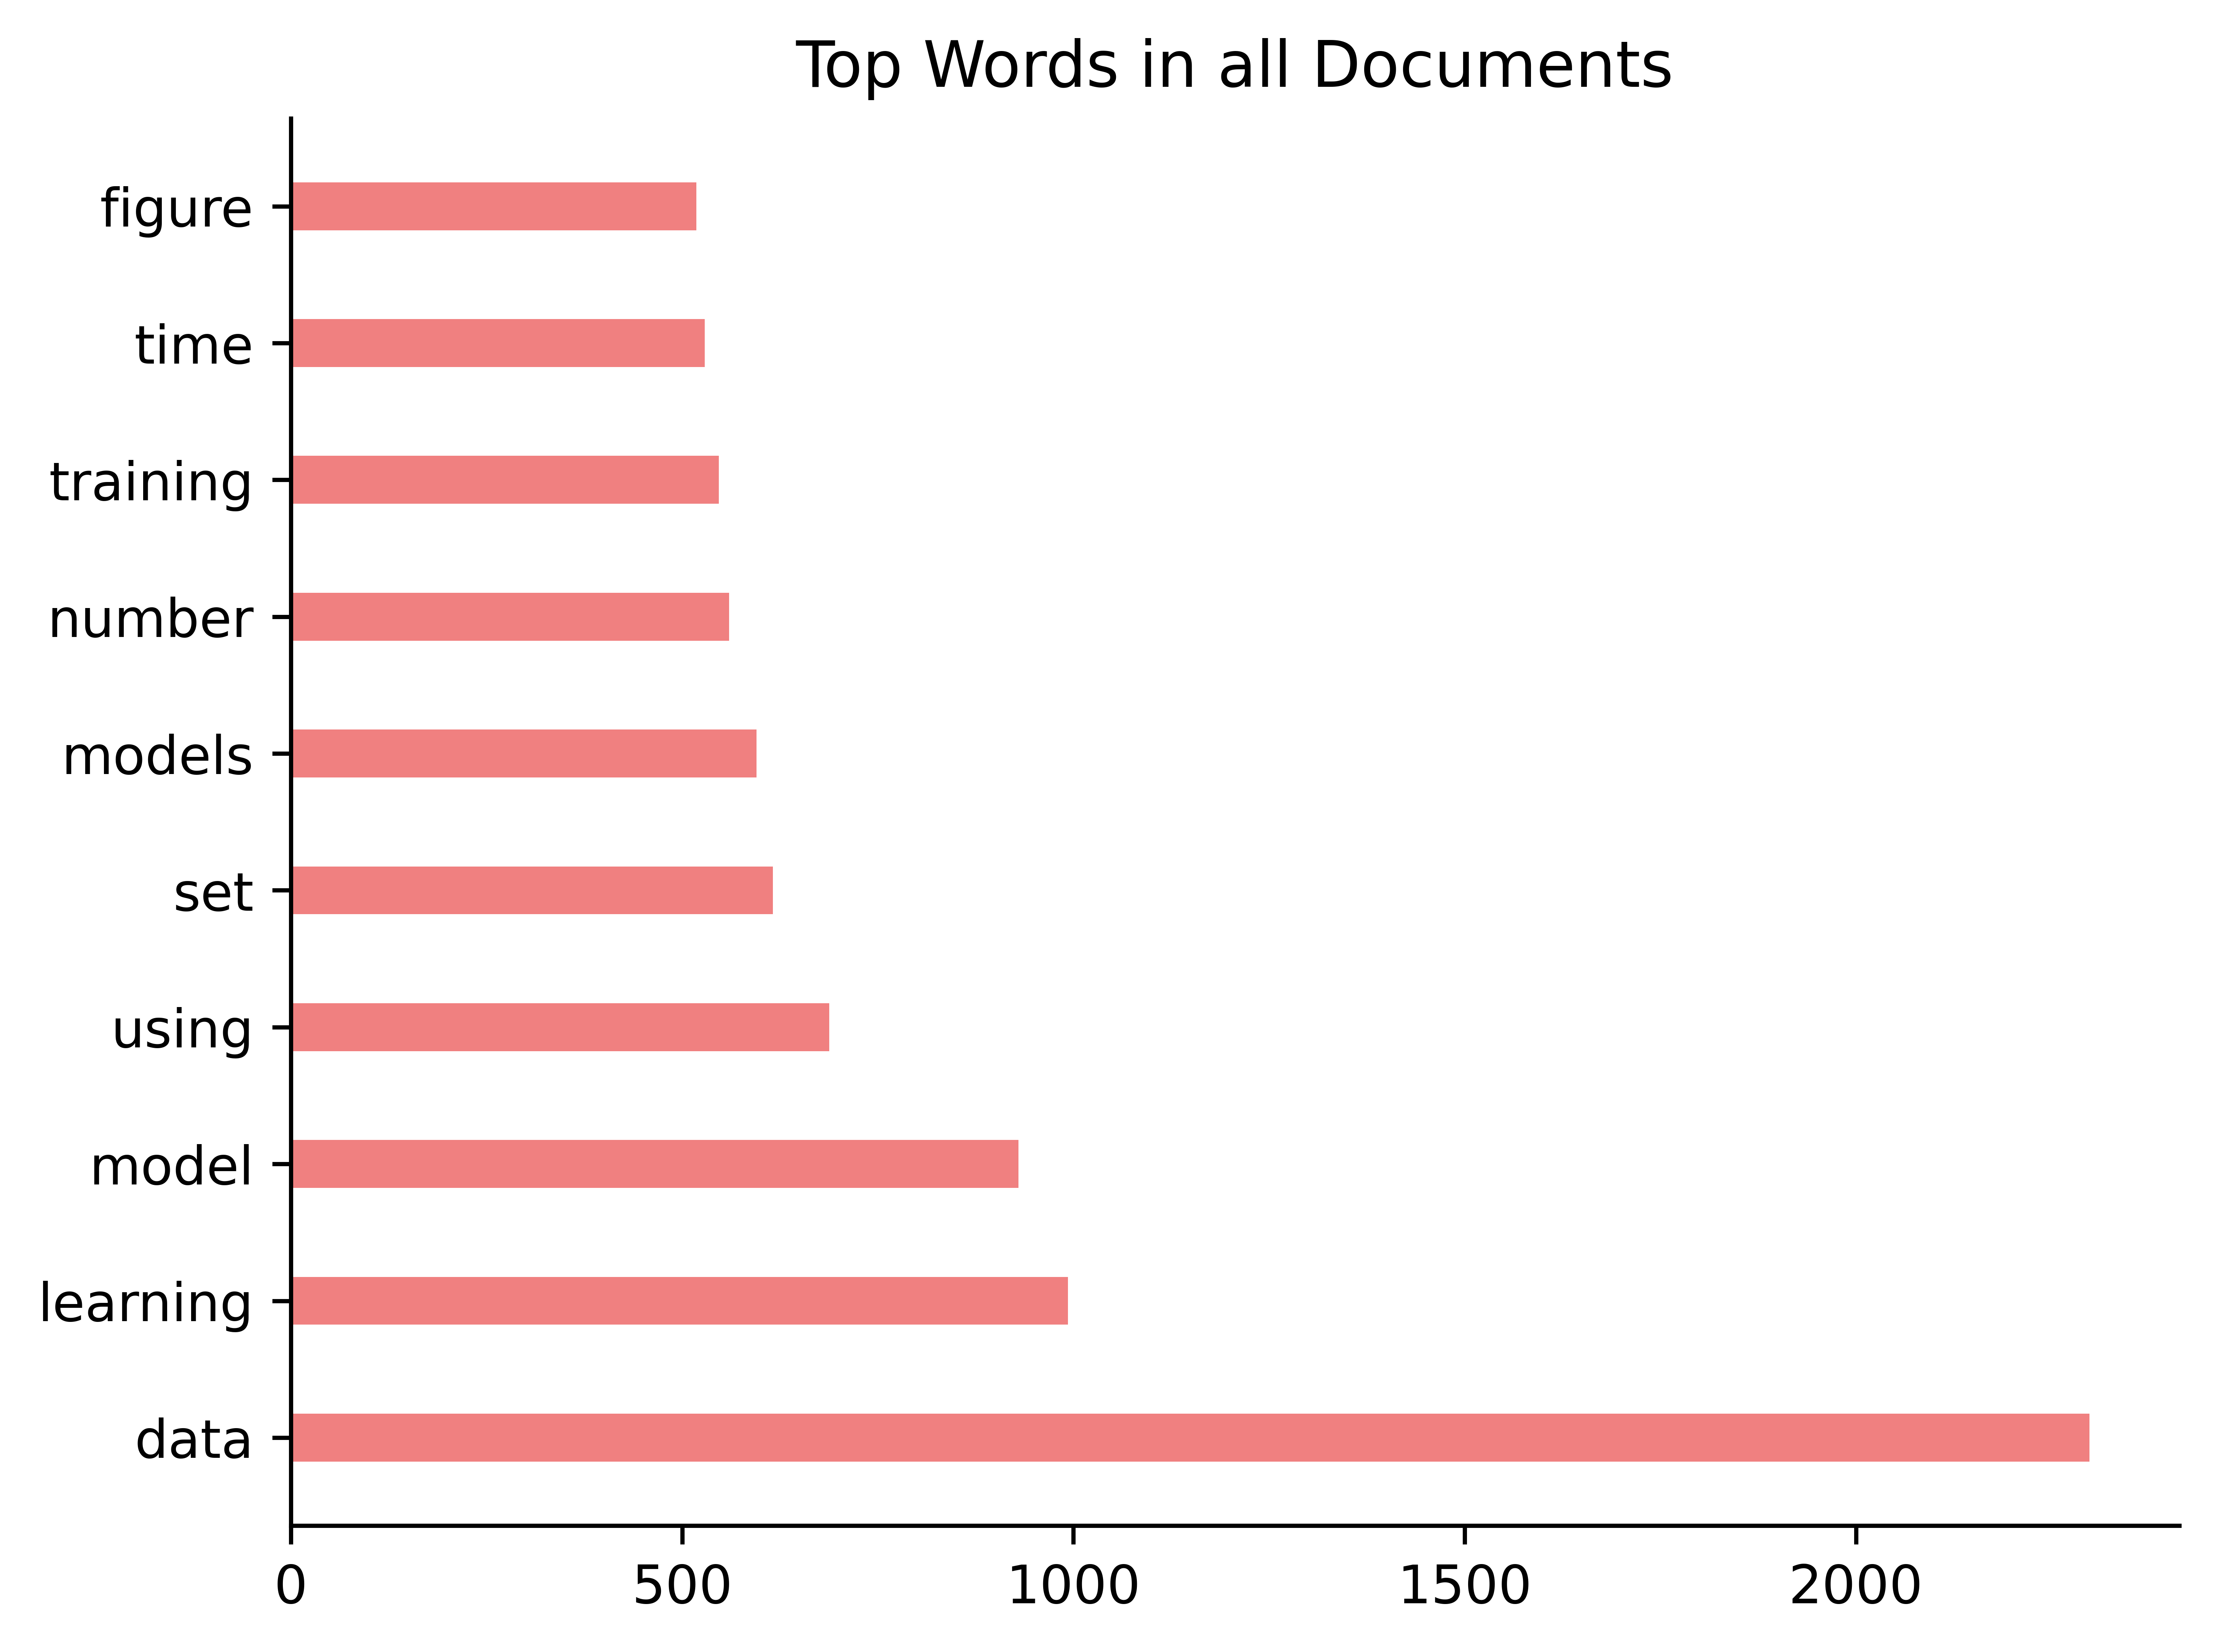

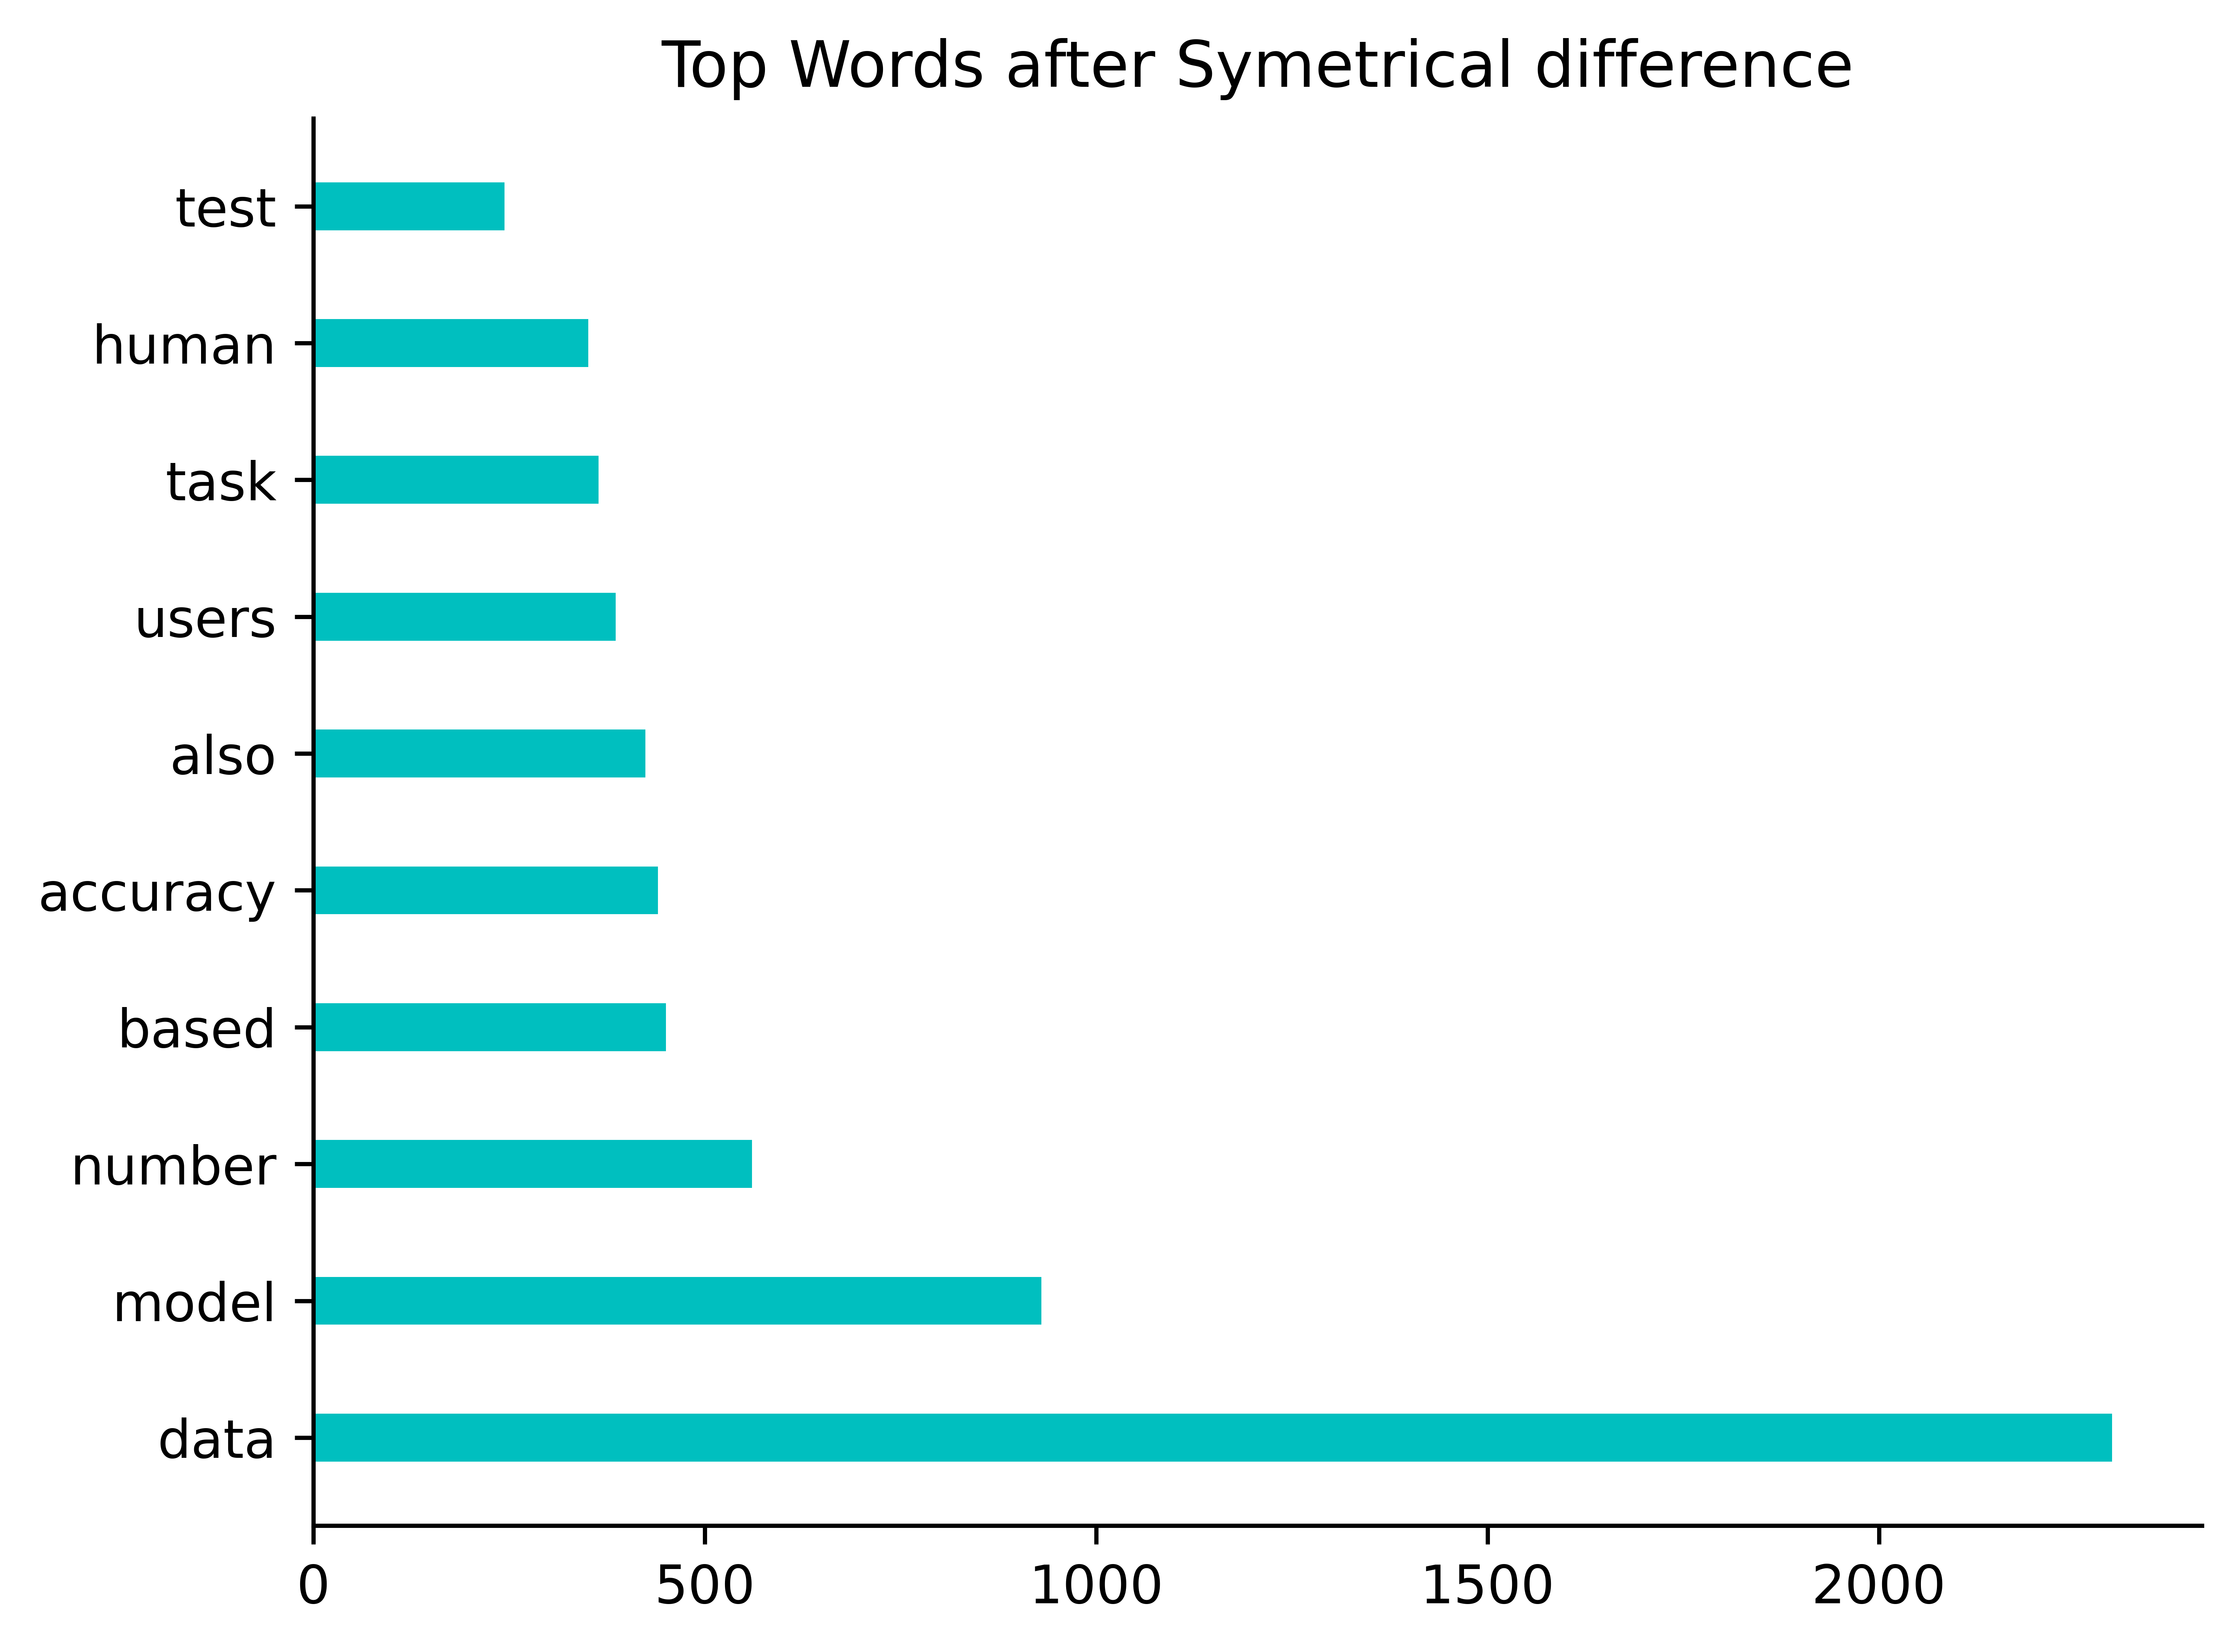

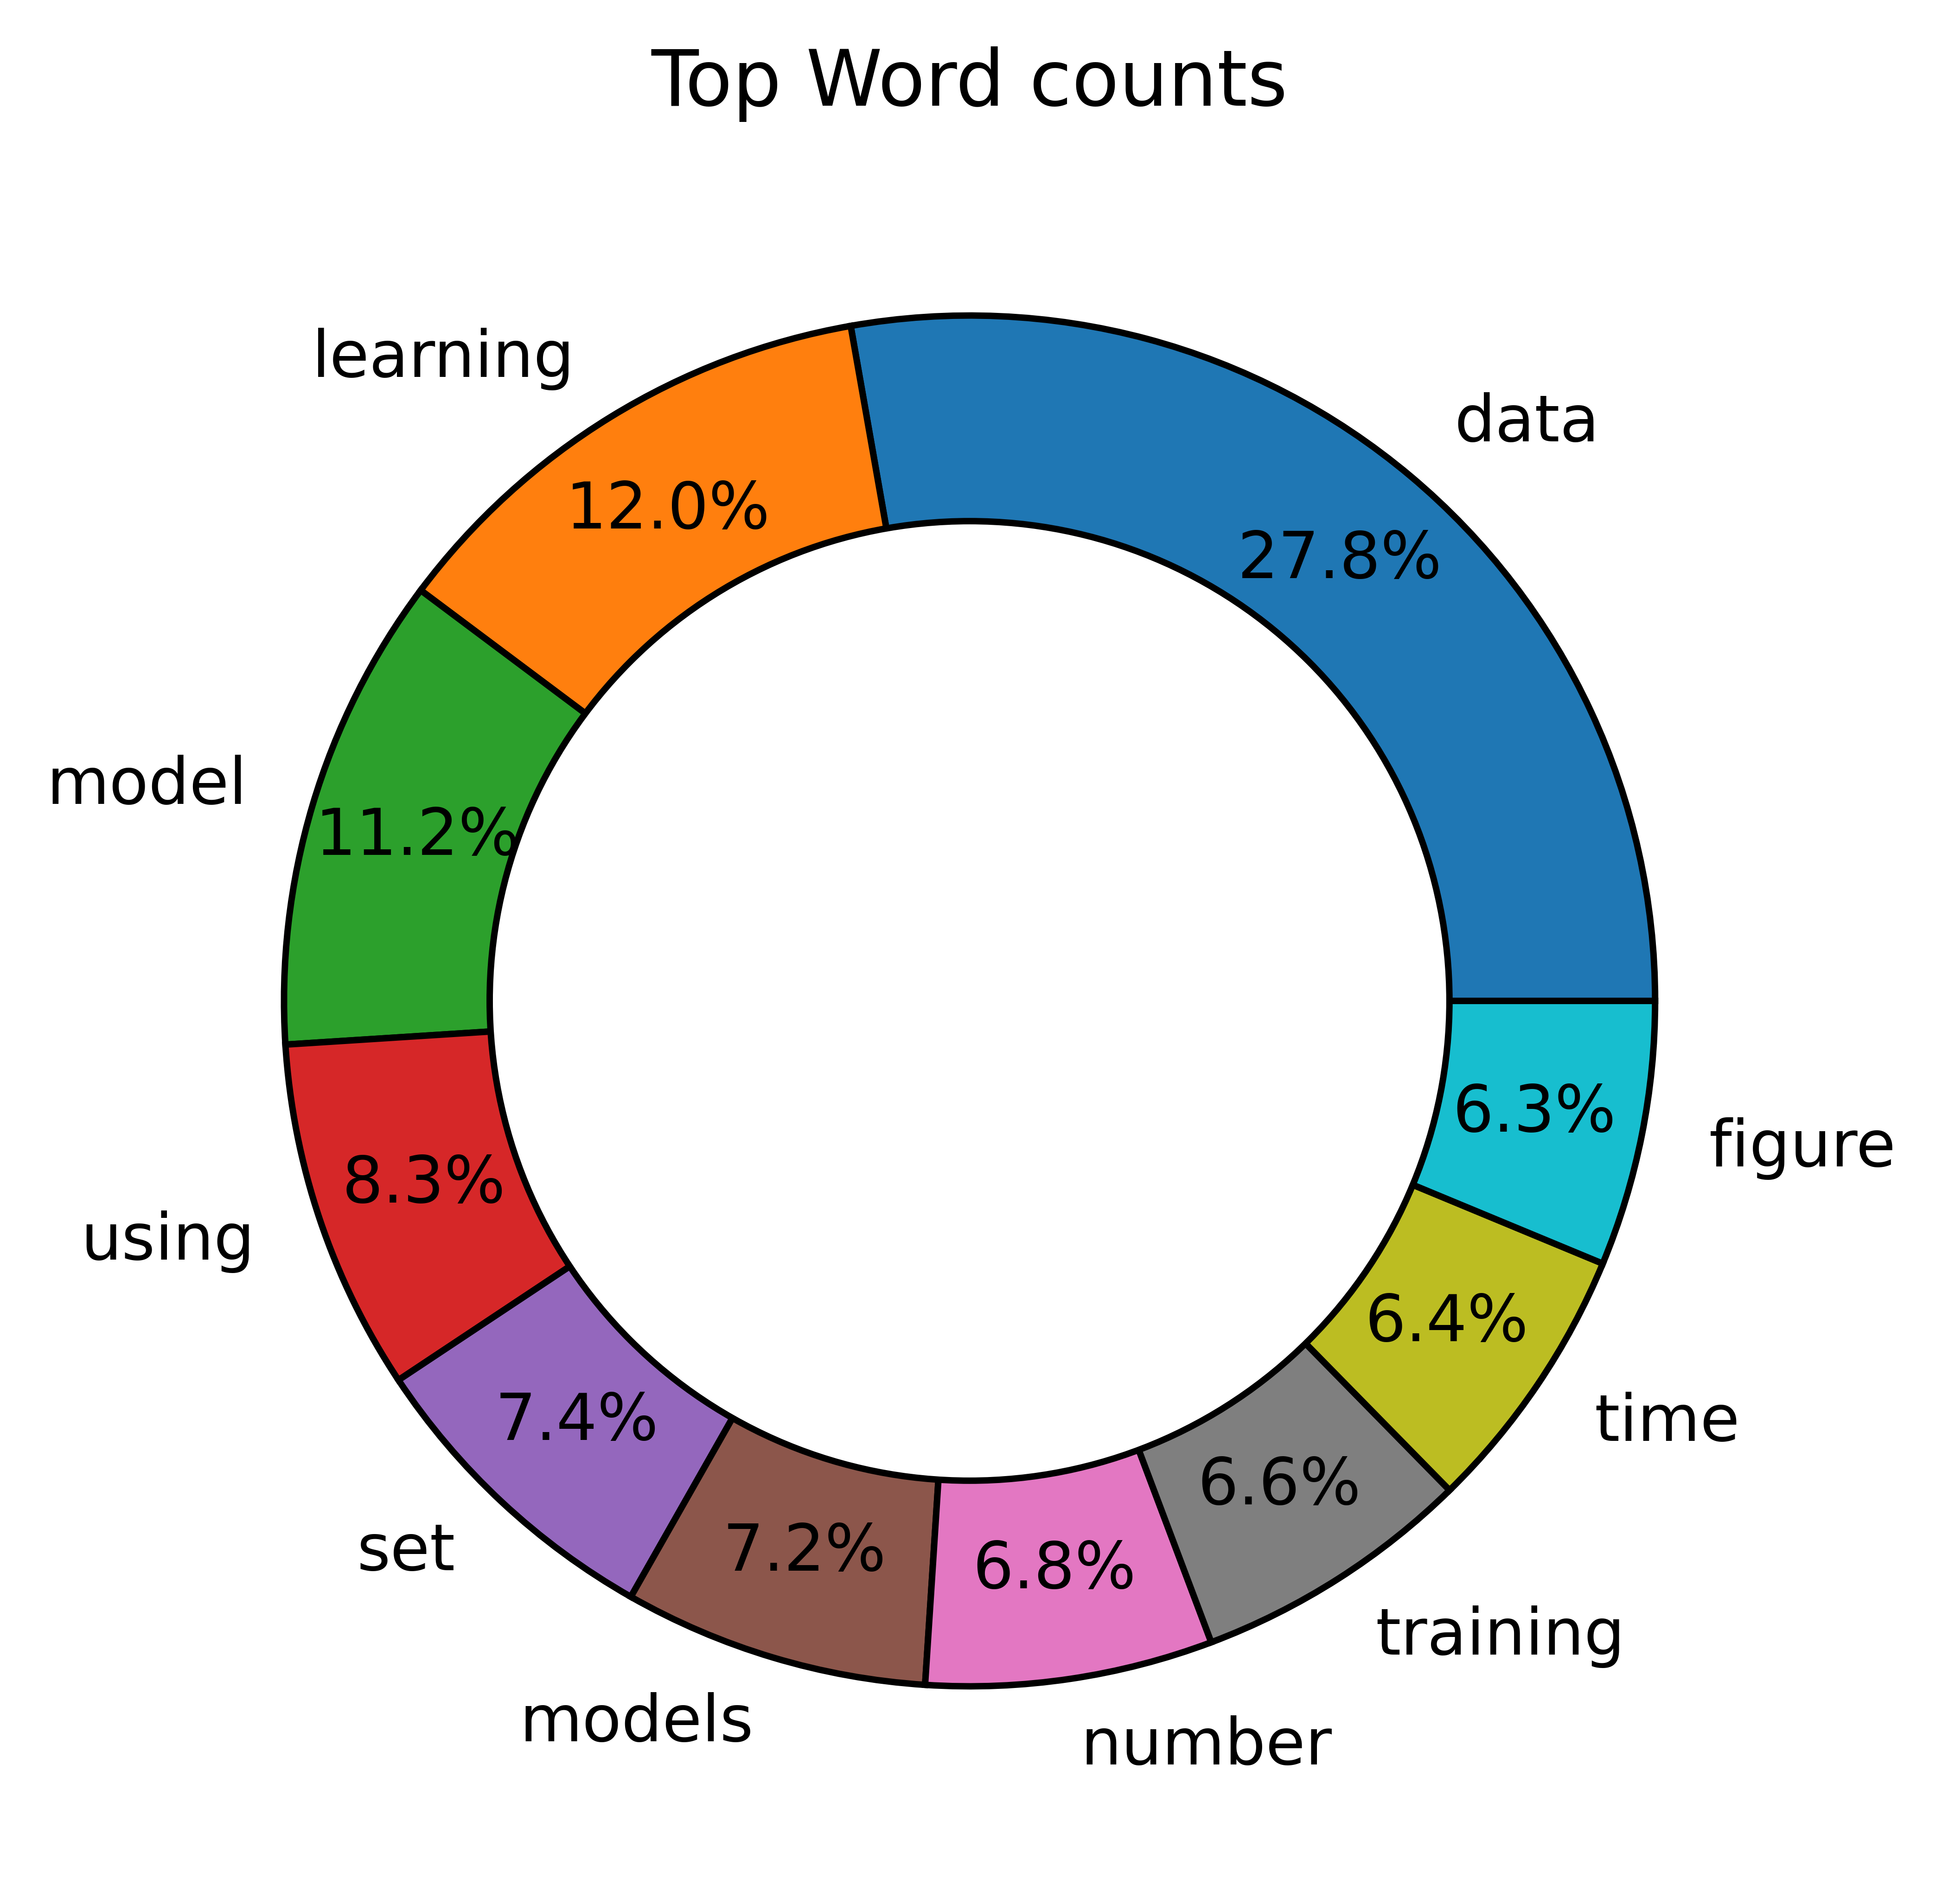

In [9]:
#----------------main-----------------------#

plt.rcParams['figure.dpi']=1000

barh(highest_count,0,1,'Top Words in all Documents', 'lightcoral')
barh(tf3,0,1, 'Top Words after Symetrical difference','c')
pie(highest_count,0,1)
cloud(book)
